In [ ]:
# INTRODUCTION
This is data collected by web-scrapping from amazon.in
This Image-data has three category( JEANS, SAREES, TROUSERS)
. jeans = 0
. saree = 1
. trouser = 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
import os

from IPython.display import Image

In [2]:
TEST_DIR= '/content/drive/MyDrive/Test'
TRAIN_DIR= '/content/drive/MyDrive/Train'

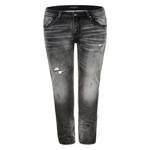

In [3]:
Image('/content/drive/MyDrive/Train/Jeans/Image_19.jpg') ##  JEANS IMAGE

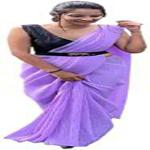

In [4]:
Image('/content/drive/MyDrive/Train/Sarees/SAREE1.jpg') ##  SAREE IMAGE

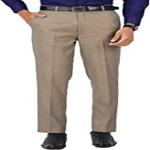

In [5]:
Image('/content/drive/MyDrive/Train/Trouser/TROUSER109.jpg') ## TROUSER IMAGE

In [6]:
##
Train_dir = '/content/drive/MyDrive/Train'       ## train data directory
category = ['Jeans', 'Sarees', 'Trouser']
train_data= []
train_label= []

for items in category:
    class_num = category.index(items)
    path= os.path.join(Train_dir, items)
    for img_dir in os.listdir(path):
        img = imread(os.path.join(path,img_dir))
        resize_img = resize(img, (150,150,3))
        train_data.append(resize_img.flatten())
        train_label.append(class_num)
        
train_data = np.array(train_data)   # when we apply imread function of skimage, we get normalised array
train_label = np.array(train_label)


In [7]:
print(len(train_data))
print(len(train_label))

print(len(train_data[0]))
train_label[800:846]

905
905
67500


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [8]:
##
Test_dir = '/content/drive/MyDrive/Test'
category = ['Jeans', 'Sarees', 'Trouser']
test_data = []                           # creating empty test_data list
test_label = []                           #  create empty test label list

for items in category:
    class_num = category.index(items)   # creating labels 
    path= os.path.join(Test_dir, items)
    for img_dir in os.listdir(path):
        img = imread(os.path.join(path,img_dir))
        resize_img = resize(img, (150,150,3))     # resizing images
        test_data.append(resize_img.flatten())   # flattening numpy array and appending into variable
        test_label.append(class_num)             # 
        
test_data = np.array(test_data)                 # convert into numpy array of test_data
test_label = np.array(test_label)               # test label

In [9]:
print(len(test_data))
print(len(test_label))

151
151


In [12]:
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.model_selection import *

In [13]:
##
x_train = train_data      # training the model 
y_train = train_label    # 
x_test = test_data      # test the model on this data
y_test = test_label     # checking test accuracy on this data

In [ ]:
##
# FIRST, WE USED CROSS VALIDATION FOR CHECKING WHICH ALGORITHM PERFORMED BETTER ON THIS DATA 
# AND THAT ALGORITHM GET MORE CROSS-VALIDATION SCORE THEN APPLY HYPER PARAMTER TUNING WITH GRIDSEARCHCV ON THAT ALGORITHM

In [19]:
##  LET'S USE CROSS-VALIDATION WITH   SVM
kfold = KFold(n_splits=10,shuffle=True)
cross_val_score(SVC(), x_train,y_train, cv=kfold, n_jobs=-1).mean()

0.8695482295482295

In [20]:
##     LET'S USE CROSS-VALIDATION WITH     KNN
from sklearn.neighbors import KNeighborsClassifier
cross_val_score(KNeighborsClassifier(), x_train,y_train, cv=kfold, n_jobs=-1).mean()

0.8033211233211235

In [21]:
##   LET'S UUSE CROSS-VALIDATION WITH  ExtraTressClassifier

cross_val_score(ExtraTreesClassifier(), x_train,y_train, cv=kfold, n_jobs=-1).mean()

0.8926984126984129

accuracy_score= 0.8807947019867549
classification_report 
               precision    recall  f1-score   support

           0       0.88      0.85      0.87        54
           1       0.93      0.96      0.94        53
           2       0.82      0.82      0.82        44

    accuracy                           0.88       151
   macro avg       0.88      0.88      0.88       151
weighted avg       0.88      0.88      0.88       151



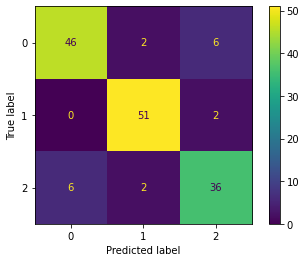

In [15]:
## SVM CLASSIFIER  MODEL
svm= SVC(C=80,probability=True,degree=7)
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)
print('accuracy_score=',accuracy_score(y_test, svm_pred))
print('classification_report \n',classification_report(y_test, svm_pred))

# PLOT CONFUSION MATRIX  of SVM MODEL
cm= confusion_matrix(y_test, svm_pred, labels= svm.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
disp.plot()
plt.show()

accuracy_score= 0.8609271523178808
classification_report 
               precision    recall  f1-score   support

           0       0.91      0.78      0.84        54
           1       0.85      0.98      0.91        53
           2       0.82      0.82      0.82        44

    accuracy                           0.86       151
   macro avg       0.86      0.86      0.86       151
weighted avg       0.86      0.86      0.86       151



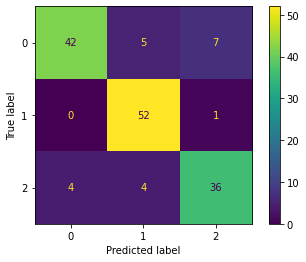

In [16]:
##    extraTreeClassifier
et_c = ExtraTreesClassifier()
et_c.fit(x_train, y_train)
et_pred = et_c.predict(x_test)
print('accuracy_score=',accuracy_score(y_test, et_pred))
print('classification_report \n',classification_report(y_test, et_pred))

# PLOT CONFUSION MATRIX  of KNN MODEL
cm= confusion_matrix(y_test, et_pred, labels= et_c.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=et_c.classes_)
disp.plot()
plt.show()

accuracy_score= 0.8278145695364238
classification_report 
               precision    recall  f1-score   support

           0       0.78      0.80      0.79        54
           1       0.88      0.96      0.92        53
           2       0.82      0.70      0.76        44

    accuracy                           0.83       151
   macro avg       0.83      0.82      0.82       151
weighted avg       0.83      0.83      0.83       151



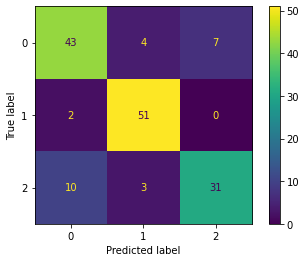

In [17]:
##  KNN MODEL
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
print('accuracy_score=',accuracy_score(y_test, knn_pred))
print('classification_report \n',classification_report(y_test, knn_pred))

# PLOT CONFUSION MATRIX  of KNN MODEL
cm= confusion_matrix(y_test, knn_pred, labels= knn.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot() 
plt.show()

In [ ]:
##     
ET_C= ExtraTreesClassifier(n_jobs= -1)
param = {'n_estimators':[220,600,1200,],'min_samples_split':[3,7,14,23],'min_samples_leaf':[1,6,13], 'bootstrap':[True, False],'oob_score':[True,False]}
grid= GridSearchCV(ET_C, param_grid=param, cv=kfold, n_jobs= -1)
grid.fit(x_train, y_train)
grid.best_params_

In [ ]:
##  CNN MODEL

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.regularizers import l1, l2

In [2]:
# loading image data 
train_data= keras.utils.image_dataset_from_directory(
    directory= '/content/drive/MyDrive/Train',
    labels= 'inferred',
    label_mode= 'int',
    batch_size= 5,
    image_size= (150,150)
)

test_data= keras.utils.image_dataset_from_directory(
    directory= '/content/drive/MyDrive/Test',
    labels= 'inferred',
    label_mode= 'int',
    batch_size= 5,
    image_size= (150,150)
)

Found 905 files belonging to 3 classes.
Found 151 files belonging to 3 classes.


In [3]:
## NORMALIzation
def process (image,label):
  image= tf.cast(image/255. ,tf.float32)
  return image, label

train_data= train_data.map(process)
test_data= test_data.map(process)
#kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)

In [4]:
## CREATE CNN MODEL
model= Sequential()

model.add(Conv2D(filters=56,kernel_size=(3,3), padding= 'valid', activation='relu',input_shape=(150,150,3), kernel_regularizer=l1()))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding= 'valid'))

model.add(Conv2D(filters=32,kernel_size=(3,3), activation='relu', kernel_regularizer=l1()))
model.add(MaxPooling2D(pool_size=(2,2), padding= 'valid'))
model.add(Conv2D(filters=16,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding= 'valid'))

model.add(Flatten())
model.add(Dense(112,activation='LeakyReLU'))
model.add(Dropout((0.2)))
model.add(Dense(16,activation='LeakyReLU'))
model.add(Dense(3, activation= 'softmax'))  #LeakyReLU

In [5]:
# COMPILE MODEL
model.compile(loss='sparse_categorical_crossentropy',optimizer= 'adam' ,metrics=['accuracy'])

In [6]:
history= model.fit(train_data,epochs=13,validation_data=test_data)

Epoch 1/13
181/181 [==============================] - 6s 13ms/step - loss: 3.2536 - accuracy: 0.6729 - val_loss: 1.5172 - val_accuracy: 0.7086
Epoch 2/13
181/181 [==============================] - 2s 12ms/step - loss: 1.0664 - accuracy: 0.8254 - val_loss: 0.9198 - val_accuracy: 0.8146
Epoch 3/13
181/181 [==============================] - 3s 17ms/step - loss: 0.7069 - accuracy: 0.8608 - val_loss: 0.9369 - val_accuracy: 0.6689
Epoch 4/13
181/181 [==============================] - 2s 11ms/step - loss: 0.5796 - accuracy: 0.8641 - val_loss: 0.7371 - val_accuracy: 0.7748
Epoch 5/13
181/181 [==============================] - 3s 18ms/step - loss: 0.4581 - accuracy: 0.8829 - val_loss: 0.6356 - val_accuracy: 0.8079
Epoch 6/13
181/181 [==============================] - 2s 12ms/step - loss: 0.3943 - accuracy: 0.8983 - val_loss: 0.5786 - val_accuracy: 0.8278
Epoch 7/13
181/181 [==============================] - 2s 11ms/step - loss: 0.3565 - accuracy: 0.9050 - val_loss: 0.6064 - val_accuracy: 0.8477

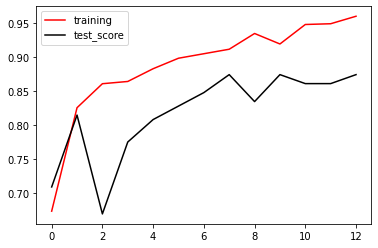

In [8]:
##
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color= 'red', label= 'training')
plt.plot(history.history['val_accuracy'], color= 'k', label= 'test_score')
plt.legend()
plt.show()